# Práctica 1

Ahora es tu turno de construir un clasificador de imágenes.

## Ejercicio obligatorio (5 puntos)

A continuación se listan una serie de datasets que están disponibles en Kaggle (algunos de los datasets seleccionados han sido recortados para que puedan entrenarse los modelos en un tiempo razonable). Para cada uno de ellos se os proporciona un enlace al dataset para que podáis descargarlo directamente. El ejercicio que tenéis que realizar obligatoriamente consiste en elegir uno de esos datasets (también podéis elegir otro que vosotros prefiráis) y construir un modelo siguiendo las instrucciones proporcionadas en el notebook de instrucciones. Deberás completar los ejercicios planteados en el informe de prácticas, ten en cuenta que en los ejercicios planteados puedes tener que realizar algún cambio en el código proporcionado.

- [Blidness dataset](https://www.kaggle.com/c/aptos2019-blindness-detection). Enlace: https://www.dropbox.com/s/cv5dfjagvj8fqk8/blindness.zip?dl=1.
- [Chest xRay dataset](https://www.kaggle.com/nih-chest-xrays/data). Enlace: https://www.dropbox.com/s/q6s4wu7q3yrpwrm/chest_xray.zip?dl=1.
- [Docknet dataset](https://www.kaggle.com/gavinarmstrong/open-sprayer-images). Enlace: https://www.dropbox.com/s/a5pzvpafvgfqvf0/Docknet.zip?dl=1.
- [Tobacco dataset](https://www.kaggle.com/sprytte/tobacco-800-dataset). Enlace: https://www.dropbox.com/s/wy44c0rsv8jogka/tobacco.zip?dl=1.

## Ejercicios opcionales

En clase hemos visto distintas formas de mejorar los modelos. A continuación se listan los ejercicios adicionales que consisten en incluir dichas mejoras para el dataset que hayas elegido anteriormente. Para que estas mejoras sean tenidas en cuenta han de ser documentadas en el propio notebook, dando una explicación de lo que se está haciendo. Debes crear un nuevo notebook para cada uno de los ejercicios que realices, completar los ejercicios planteados en el informe y guardarlo en este repositorio de GitHub.

- *Aumento de datos avanzado* (1 punto). En clase hemos visto que técnicas como MixUp o CutMix pueden ser utilizados para aumentar un dataset de imágenes. Estas técnicas se pueden incluir al entrenar modelos de FastAI mediante [callbacks](https://docs.fast.ai/callback.mixup.html). El ejercicio consiste en incluir estas técnicas para entrenar los modelos que construyas. Ten cuidado ya que no es posible utilizar a la vez ambas técnicas.
- *Label Smoothing* (0.5 puntos). Es conveniente combinar las técnicas anteriores con la técnica de LabelSmoothing. Para ello deberás cambiar la función de pérdida del `Learner` y usar la clase [LabelSmoothingCrossEntropy](https://docs.fast.ai/losses.html#LabelSmoothingCrossEntropy).
- *Progressive resizing* (0.5 puntos). En clase hemos visto la técnica de progressive resizing que consiste en entrenar el modelo inicialmente con imágenes de un tamaño, y luego continuar entrenándolo con imágenes de tamaño superior. El ejercicio consiste en entrenar tu modelo usando esta técnica. Para ello deberás definir dos `Datablock` distintos cada uno de ellos con el tamaño de imágenes que quieras utilizar, y a partir de ellos construir dos `DataLoader`. Una vez entrenado el modelo con el primer `DataLoader` deberás cambiar el  `DataLoader` del `Learner` y seguir entrenando el modelo. Tienes detallado cómo usar esta técnica en el libro de [FastAI](https://github.com/fastai/fastbook/blob/master/07_sizing_and_tta.ipynb).
- *Aumento en tiempo de test* (0.5 puntos). El ejercicio consiste en utilizar la técnica de aumento en tiempo de test para mejorar el rendimiento del modelo. El uso de esta técnica es sencillo ya que los objetos `Learner` poseen un método llamado `tta`. Tienes detallado cómo usar esta técnica en el libro de [FastAI](https://github.com/fastai/fastbook/blob/master/07_sizing_and_tta.ipynb). Deberás aplicar el aumento en tiempo de test cuando vayas a evaluar el modelo en el conjunto de test.
- *Discriminative learning rates* (0.5 puntos). El ejercicio consiste en utilizar distintos learning rates para entrenar las distintas componentes de la arquitectura de un modelo. Tienes detallado cómo aplicar esta técnica en el libro de [FastAI](https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb).   
- *Probando distintas arquitecturas* (1 punto). La librería FastAI proporciona distintas arquitecturas como distintas variantes de ResNet o DenseNet. Sin embargo, modelos más actuales como EfficientNet no están incluidos en dicha librería. Para usar dichos modelos podemos emplear la librería [timm](https://github.com/rwightman/pytorch-image-models) y el procedimiento descrito en la página de [wandb](https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw) para crear modelos con esta librería usando FastAI. El ejercicio consiste en entrenar un modelo usando una arquitectura de EfficientNet (por ejemplo la b3) y otro de ConvNext. Puedes elegir un modelo basándonte en [este notebook](https://www.kaggle.com/code/jhoward/which-image-models-are-best/notebook) de Jeremy Howard (el creador de FastAI).
- *Ensemble de modelos* (1 punto). A partir de varios modelos construye un ensemble de modelos y evalúa su rendimiento en el conjunto de test.




Al finalizar, recuerda guardar los cambios en GitHub utilizando la opción Archivo -> Guardar una copia en GitHub.

In [1]:
from fastai.vision.all import *
!wget https://www.dropbox.com/s/q6s4wu7q3yrpwrm/chest_xray.zip?dl=1 -O chest_xray.zip
!unzip chest_xray.zip
path = Path('chest_xray/')
path.ls()

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  infla

(#2) [Path('chest_xray/test'),Path('chest_xray/train')]

In [2]:
trainPath = path/'train'
testPath = path/'test'

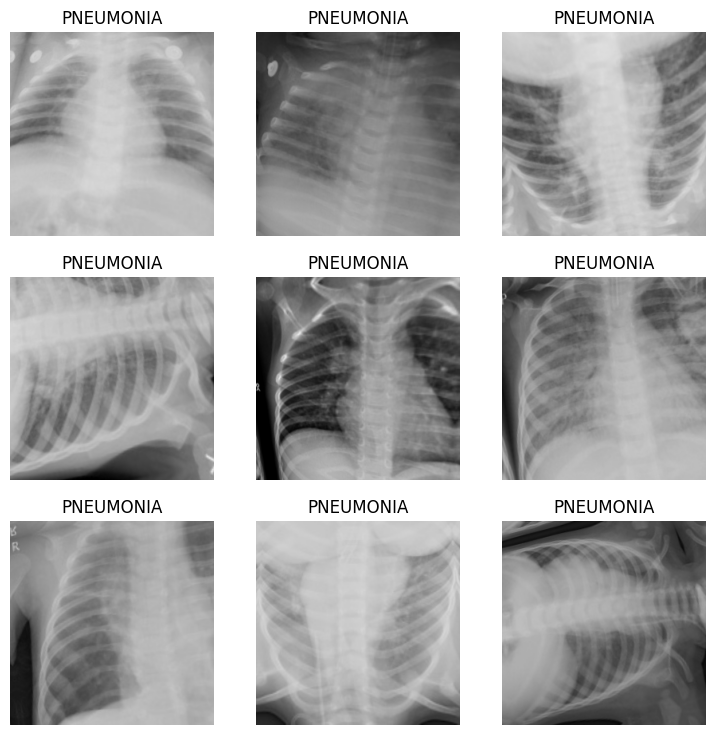

In [3]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.15,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256,flip_vert=True,max_rotate=15),Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(trainPath,bs=128) # Mantenemos el batch de 128, como en el ejemplo
dls.show_batch()

In [4]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='modelResnet34ChestXRay')
]

In [5]:
learn = vision_learner(dls,resnet34,metrics=[accuracy, Precision(), Recall()],cbs=callbacks).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


SuggestedLRs(valley=0.0010000000474974513)

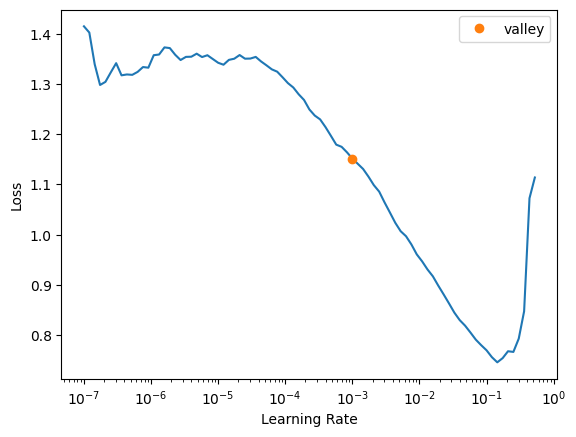

In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.769856,0.504593,0.798469,0.993348,0.742952,00:35


Better model found at epoch 0 with valid_loss value: 0.5045927166938782.


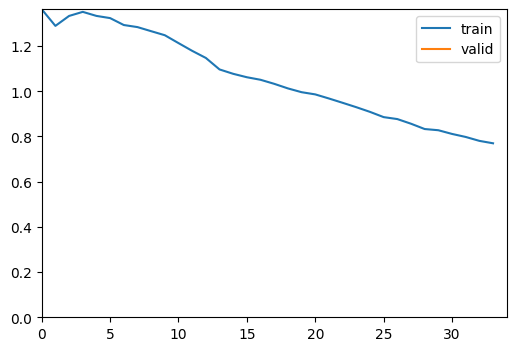

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.413711,0.396108,0.880102,0.998043,0.845771,00:37
1,0.292184,0.295446,0.954082,1.000000,0.940299,00:36
2,0.232957,0.303085,0.952806,1.000000,0.938640,00:37
3,0.172974,0.271899,0.956633,1.000000,0.943615,00:37
4,0.144105,0.169185,0.971939,0.998285,0.965174,00:37
5,0.130281,0.162961,0.971939,0.998285,0.965174,00:37
6,0.109872,0.217813,0.968112,1.000000,0.958541,00:37
7,0.095348,0.171336,0.973214,0.998288,0.966833,00:37
8,0.088537,0.184759,0.973214,0.998288,0.966833,00:37
9,0.083256,0.178034,0.973214,0.998288,0.966833,00:36


Better model found at epoch 0 with valid_loss value: 0.39610815048217773.


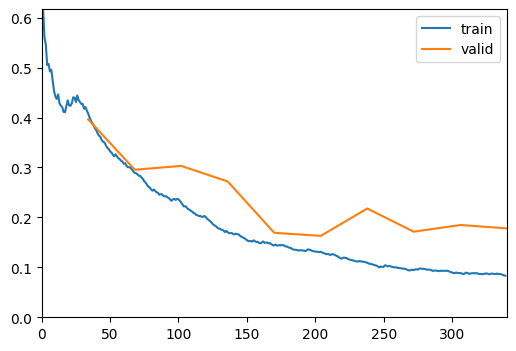

Better model found at epoch 1 with valid_loss value: 0.29544609785079956.
Better model found at epoch 3 with valid_loss value: 0.2718992233276367.
Better model found at epoch 4 with valid_loss value: 0.16918540000915527.
Better model found at epoch 5 with valid_loss value: 0.16296082735061646.


In [8]:
learn.fine_tune(10,base_lr=1e-3) # esperar a la salida del anterior

In [9]:
Path('models').ls()

(#1) [Path('models/modelResnet34ChestXRay.pth')]

In [10]:
learn.to_fp32()
learn.export()

In [11]:
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=[*aug_transforms(size=128,min_scale=0.75),Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=128)
learn.dls = dlsTest
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.8862179517745972.


(#4) [0.6657842397689819,0.8862179517745972,0.8880778588807786,0.9358974358974359]

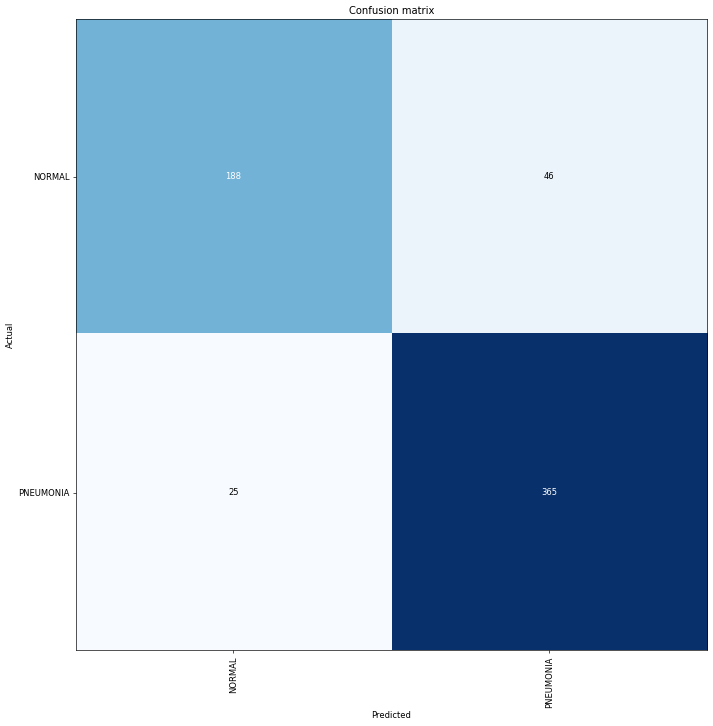

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [14]:
learn_inf = load_learner('export.pkl')

In [16]:
learn_inf.predict('chest_xray/test/PNEUMONIA/person10_virus_35.jpeg')

('PNEUMONIA', tensor(1), tensor([0.0145, 0.9855]))

In [17]:
learn_inf.predict('chest_xray/test/NORMAL/NORMAL2-IM-0027-0001.jpeg')

('NORMAL', tensor(0), tensor([0.9960, 0.0040]))

In [18]:
!pip install huggingface_hub["fastai"] -Uq
from huggingface_hub import notebook_login

notebook_login()

In [19]:
from huggingface_hub import push_to_hub_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "nlmaldonadog/pract1-firstmodel-chest-xray"

push_to_hub_fastai(learner=learn, repo_id=repo_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pkl:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/nlmaldonadog/pract1-firstmodel-chest-xray/commit/cc85037174a4ebbb190dee0d370fd78304d2c8f2', commit_message='Push FastAI model using huggingface_hub.', commit_description='', oid='cc85037174a4ebbb190dee0d370fd78304d2c8f2', pr_url=None, pr_revision=None, pr_num=None)